In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/credit_scoring.csv')

In [ ]:
df

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan
...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan
996,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan
997,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan
998,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
df.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


In [ ]:
df.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

In [ ]:
import seaborn as sns

<Axes: xlabel='Credit Utilization Ratio'>

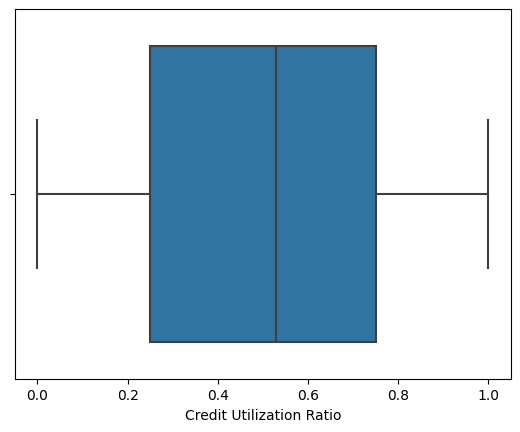

In [ ]:
sns.boxplot(x=df['Credit Utilization Ratio'], data=df)

<Axes: xlabel='Loan Amount', ylabel='Count'>

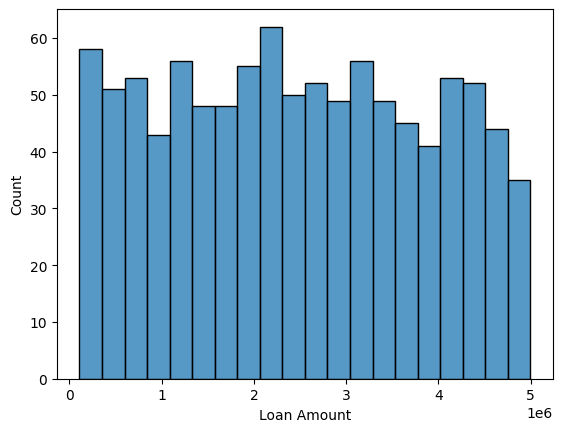

In [ ]:
sns.histplot(df['Loan Amount'], bins=20)

<ipython-input-46-7b65d96d700b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

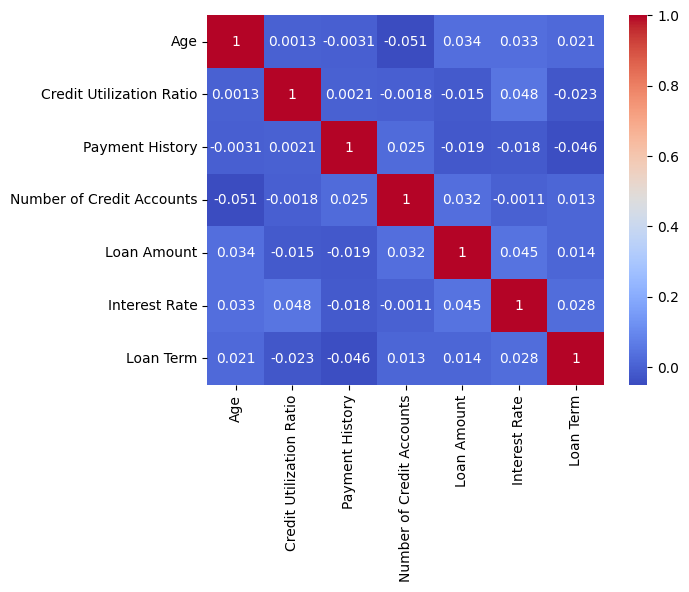

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

In [ ]:
education = {'High School':1, 'Bachelor':2, 'Master':3, 'PhD':4}
employment = {'Unemployed':1, 'Employed':2, 'Self-Employed':3}

df['Education Level'] = df['Education Level'].map(education)
df['Employment Status'] = df['Employment Status'].map(employment)

In [ ]:
credit_scores = []

for index, row in df.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']

    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

df['Credit Score'] = credit_scores

print(df.head())

   Age  Gender Marital Status  Education Level  Employment Status  \
0   60    Male        Married                3                  2   
1   25    Male        Married                1                  1   
2   30  Female         Single                3                  2   
3   58  Female        Married                4                  1   
4   32    Male        Married                2                  3   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  Credit Score  
0      4675000           2.65         48  Personal Loan       

In [ ]:
from sklearn.cluster import KMeans
X = df[['Credit Score']]
kmeans = KMeans(n_clusters = 4, n_init = 10, random_state=42)
kmeans.fit(X)
df['Segment'] = kmeans.labels_

In [ ]:
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score,Segment
0,60,Male,Married,3,2,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.616,3
1,25,Male,Married,1,1,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.460,3
2,30,Female,Single,3,2,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.316,3
3,58,Female,Married,4,1,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.686,0
4,32,Male,Married,2,3,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.897,0


<Axes: ylabel='Credit Score'>

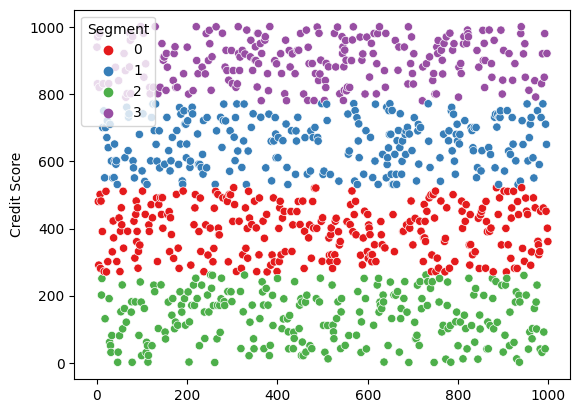

In [ ]:
df['Segment'] = df['Segment'].astype('category')
sns.scatterplot(x=df.index, y=df['Credit Score'],hue = df['Segment'], palette='Set1')

<Axes: ylabel='Credit Score'>

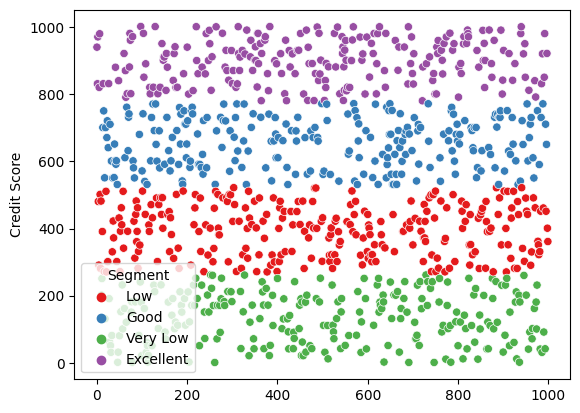

In [ ]:
df['Segment'] = df['Segment'].map({2:'Very Low',
                                   0:'Low',
                                   1:'Good',
                                   3:'Excellent'})

df['Segment'] = df['Segment'].astype('category')
sns.scatterplot(x=df.index, y=df['Credit Score'],hue = df['Segment'], palette='Set1')